In [1]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from sklearn.cluster import KMeans

In [2]:
engagement_df = pd.read_csv('../data/user_overview_clean_df.csv')
engagement_df.head()

,MSISDN/Number,num_xdr sessions,Start ms,End ms,Start,End,Dur. (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,...,Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL),Total(DL/UL),Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,...,292.426453,17.855187,18.355943,3.701304,2.905912,1.570185,345.629377,47.0,76411.0,67.0
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),...,609.920783,35.565545,39.359124,0.937385,4.414096,1.933278,707.185356,70.0,3728.0,42.0
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),...,229.980251,23.751202,34.425237,3.363124,10.229119,1.726277,307.690973,70.0,0.0,15.0
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,1.321510e+09,undefined,undefined,...,810.387875,15.092588,36.534765,2.070983,11.811761,0.657493,889.352748,70.0,41212.0,88.0
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,1.089009e+09,Samsung,Samsung Sm-G390F,...,531.237049,17.539799,34.222253,2.110349,7.748843,0.912788,607.681403,70.0,0.0,15.0


In [3]:
engagement_df.isna().sum()

MSISDN/Number            0
num_xdr sessions         0
Start ms                 0
End ms                   0
Start                    0
End                      0
Dur. (ms)                0
Dur. (ms).1              0
Handset Manufacturer     0
Handset Type             0
Last Location Name       0
IMSI                     0
IMEI                     0
Total DL (Bytes)         0
Total UL (Bytes          0
Other(UL/DL)             0
Gaming(UL/DL)            0
Netflix(UL/DL)           0
Youtube(UL/DL)           0
Email(UL/DL)             0
Google(UL/DL)            0
Social Media(UL/DL)      0
Total(DL/UL)             0
Avg Delay (ms)           0
Activity_Duration(ms)    0
Avg Throughput (kbps)    0
dtype: int64

In [5]:
engagement_df['sessions frequency'] = engagement_df.groupby('MSISDN/Number')['num_xdr sessions'].transform('sum')


In [6]:
engagement_df['sessions frequency'].head()


0    1
1    1
2    1
3    1
4    2
Name: sessions frequency, dtype: int64

In [8]:
new_df = engagement_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]

In [9]:
new_df.head()

,MSISDN/Number,Total(DL/UL),Dur. (ms),sessions frequency
0,3.360100e+10,345.629377,1823652.0,1
1,3.360100e+10,707.185356,1365104.0,1
2,3.360100e+10,307.690973,1361762.0,1
3,3.360101e+10,889.352748,1321509.0,1
4,3.360101e+10,607.681403,1089009.0,2


In [11]:
# The top 10 customers per duration session
new_df = new_df[['MSISDN/Number', 'Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']]
top_dur = new_df[['MSISDN/Number', 'Dur. (ms)']].head(10)

In [12]:
top_dur

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.360100e+10,1365104.0
2,3.360100e+10,1361762.0
3,3.360101e+10,1321509.0
4,3.360101e+10,1089009.0
5,3.360101e+10,1074638.0
6,3.360101e+10,1035261.0
7,3.360101e+10,951292.0
8,3.360101e+10,941634.0
9,3.360102e+10,864482.0


In [13]:
top_dur.to_csv('../data/top_ten_session_duration.csv')

In [15]:
# Top 10 customers per session frequency
new_df.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
top_freq =new_df[['MSISDN/Number', 'sessions frequency']].head(10)

In [16]:
top_freq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.362578e+10,17
2,3.361489e+10,17
3,3.365973e+10,16
4,3.376054e+10,15
5,3.367588e+10,15
6,3.366716e+10,13
7,3.360313e+10,12
8,3.378632e+10,12
9,3.362708e+10,12


In [17]:
top_freq.to_csv('../data/top_ten_session_frequency.csv')

In [20]:
# Top 10 customers on Total Downloads and Uploads
new_df.sort_values(by='Total(DL/UL)', ascending=False, inplace=True, ignore_index=True)
top_ul_dl = new_df[['MSISDN/Number', 'Total(DL/UL)']].head(10)

In [21]:
top_ul_dl

,MSISDN/Number,Total(DL/UL)
0,3.366317e+10,955.984776
1,3.366755e+10,952.307464
2,3.367575e+10,951.775502
3,3.366558e+10,949.987157
4,3.361325e+10,949.598255
5,3.366286e+10,949.172538
6,3.363204e+10,948.234086
7,3.367149e+10,947.827452
8,3.369810e+10,947.169694
9,3.366705e+10,947.014951


In [23]:
top_ul_dl.to_csv('../data/top_ten_UL_DL.csv')

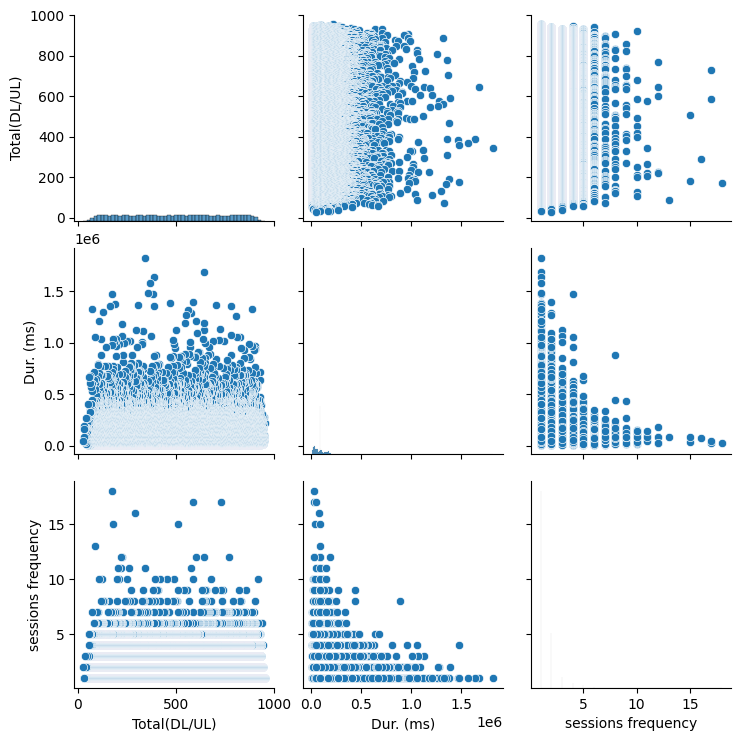

In [28]:
# visualizing columns befor normalization 
import seaborn as sns
%matplotlib inline
sns.pairplot(engagement_df[['Total(DL/UL)', 'Dur. (ms)', 'sessions frequency']],palette='set2')

In [29]:
# Noramlizing duration
from sklearn.preprocessing import MinMaxScaler
normalize_column_df = pd.DataFrame(new_df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
new_df['Dur. (ms)'] = scaled_values

In [ ]:
# Normalizing session frequency
normalize_column_df = pd.DataFrame(new_df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
new_df['sessions frequency'] = scaled_values